# Project 00: PyParticleBunch: Bunch Generation Widget
---

## Prerequisites
Please complete the courses in ../00_Teaching_Material before attempting this project

- [ ] Introduction to Jupyter Notebooks
- [ ] Introduction to PyParticleBunch

### Optional
- [ ] Introduction to iPython widgets

---
# Suggested Approach to Projects:

<div class="alert alert-block alert-success">
<b>Step 1 (Easy)</b> Prototype your code: play with python until it does what you want it to do!
</div>

<div class="alert alert-block alert-warning">
<b>Step 2 (Moderate):</b> Functions: convert your working messy code into nice clean functions, remember to think carefully about function and variable names, inputs to the function (arguments), and what it outputs.
</div>

<div class="alert alert-block alert-danger">
<b>Step 3 (Advanced) </b> Widget: try to use iPython widgets to turn your functions into a GUI (graphical user interface)
</div>

# Project Goal:

To produce a widget that generates a PyParticleBunch object, and print the bunch co-ordinates to a file.

Things to consider:
- How many dimensions do we want to populate? i.e. do I want 1D, 2D, 4D, etc
- What type of bunch do we want? Uniform? Gaussian? Waterbag? KV? Poincare?
- What parameters define this type of bunch?
- Do we want a matched bunch? If so what are the matching parameters?
- How many particles?
- What type of file do we want to save? MADX? PTC?

---
# Example Code

In [1]:
from PyParticleBunch import *

beta_x = 3.215250830692
beta_y = 18.598794417925
alpha_x =  -0.547366008626
alpha_y =  2.750780302852
D_x =  -0.000103040524
D_xp = 0.001254020379
D_y = 0.
D_yp = 0.
emittance_x = emittance_y = 400 * 1E-6
x_limit = 5
y_limit = 5
n = 1E5

Matched_Gaussian_4D_bunch = ParticleBunch.MatchedGaussian_4D(n, emittance_x, emittance_y, alpha_x, beta_x, alpha_y, beta_y, x_limit = 5, y_limit = 5)

In [1]:

import ipywidgets as widgets
from IPython.display import display

# PyParticleBunch : matplotlib.pyplot module is required. 
# PyParticleBunch : matplotlib.gridspec module is required. 


####  Generate 4D Matched Gaussian

In [12]:
beta_x = 3.215250830692
beta_y = 18.598794417925
alpha_x =  -0.547366008626
alpha_y =  2.750780302852
D_x =  -0.000103040524
D_xp = 0.001254020379
D_y = 0.
D_yp = 0.
emittance_x = emittance_y = 400 * 1E-6
x_limit = 5
y_limit = 5
n = 1E5

In [13]:
Matched_Gaussian_4D_bunch = ParticleBunch.MatchedGaussian_4D(n, emittance_x, emittance_y, alpha_x, beta_x, alpha_y, beta_y, x_limit = 5, y_limit = 5)

#### Plot Matched Gaussian x-xp trace space

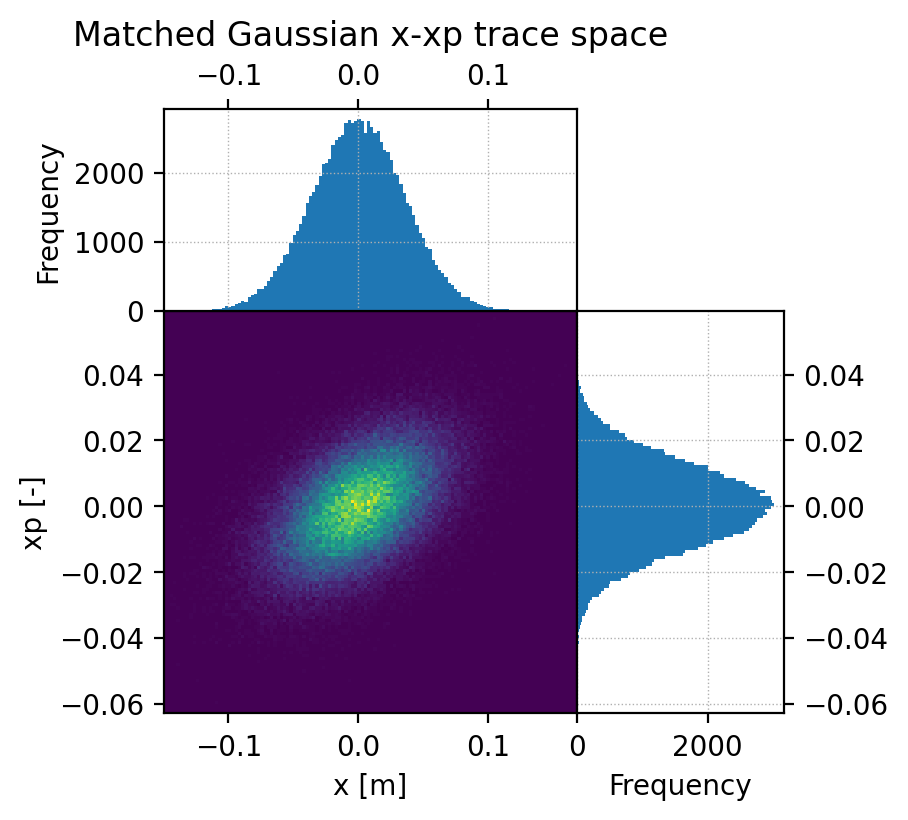

In [5]:
Matched_Gaussian_4D_bunch.plot_heatmap('x', 'xp', None, 'Matched Gaussian x-xp trace space')

#### Create widget output handlers

In [6]:
output = widgets.Output()
plot_output = widgets.Output()

#### Function that generates 4D Gaussian bunch and plots it - vary matching parameters

In [7]:
def Generate_and_plot_4D_Matched_Gaussian(alpha_x, beta_x, generate=False):
    # clear widget output handlers
    output.clear_output()
    plot_output.clear_output()
    
    if generate:
        #beta_x = 3.215250830692
        beta_y = 18.598794417925
        #alpha_x =  -0.547366008626
        alpha_y =  2.750780302852
        D_x =  -0.000103040524
        D_xp = 0.001254020379
        D_y = 0.
        D_yp = 0.
        emittance_x = emittance_y = 400 * 1E-6
        x_limit = 5
        y_limit = 5
        n = 1E5

        bunch = ParticleBunch.MatchedGaussian_4D(n, emittance_x, emittance_y, alpha_x, beta_x, alpha_y, beta_y, x_limit = 5, y_limit = 5)
        with plot_output:
            bunch.plot_heatmap('x', 'xp', None, 'Matched Gaussian x-xp trace space')

#### Slider Widget to select beta_x

In [8]:
beta_x_slider = widgets.FloatSlider(
    value=18.6,
    min=0.,
    max=50.,
    step=0.1,
    description=r'$\beta_x$:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

In [9]:
display(beta_x_slider)

FloatSlider(value=18.6, description='$\\beta_x$:', max=50.0, readout_format='.1f')

In [10]:
alpha_x_slider = widgets.FloatSlider(
    value=-0.547366008626,
    min=-5.,
    max=5.,
    step=0.1,
    description=r'$\alpha_x$:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

In [11]:
display(alpha_x_slider)

FloatSlider(value=-0.547366008626, description='$\\alpha_x$:', max=5.0, min=-5.0)

In [12]:
alpha_x_slider.value

-0.547366008626

In [13]:
beta_x_slider.value

18.6

#### Generate button

In [14]:
generate_bunch_button = widgets.Button(description="Generate Bunch")

#### Widget event handlers

In [15]:
def alpha_x_eventhandler(change):
    Generate_and_plot_4D_Matched_Gaussian(change.new, beta_x_slider.value)

In [16]:
def beta_x_eventhandler(change):
    Generate_and_plot_4D_Matched_Gaussian(alpha_x_slider.value, change.new)

In [17]:
def generate_button_eventhandler(change):
    Generate_and_plot_4D_Matched_Gaussian(alpha_x_slider.value, beta_x_slider.value, True)

In [18]:
alpha_x_slider.observe(alpha_x_eventhandler, names='value')

In [19]:
beta_x_slider.observe(beta_x_eventhandler, names='value')

In [20]:
generate_bunch_button.on_click(generate_button_eventhandler)

#### GUI Setup

In [21]:
item_layout = widgets.Layout(margin='0 0 50px 0')

In [22]:
input_widgets = widgets.HBox(
[alpha_x_slider, beta_x_slider, generate_bunch_button],
layout=item_layout)
tab = widgets.Tab([output, plot_output],
layout=item_layout)

In [23]:
dashboard = widgets.VBox([input_widgets])
display(dashboard)

In [24]:
display(plot_output)

Output()

---
# Your turn

Can you try to create an iPython widget that does the following?

## Functionality Required (try adding one thing at a time)

- [ ] Generate a single type of bunch (see Intro to PyParticleBunch for types)
    - [ ] Select number of particles
    - [ ] Set matching parameters
    - [ ] Set bunch specific parameters
    - [ ] Save bunch to MAD-X / PTC / data file
- [ ] Generate a different type of bunch
    - [ ] Select number of particles
    - [ ] Set matching parameters
    - [ ] Set bunch specific parameters
    - [ ] Save bunch to MAD-X / PTC / data file
    
### Bonus Tasks
- [ ] Generalise to generate any bunch type
- [ ] Generate bunch from file?

In [14]:
#import the necessary modules
import ipywidgets as widgets
from IPython.display import display
from PyParticleBunch import *

def generate_bunch():
    #Create the input fields to set the specifications of the particle bunch
    global BunchType
    BunchType = widgets.RadioButtons(
        options=['Uniform','Gaussian', 'Waterbag', 'KV', 'Poincare'],
        description='Bunch type:',
        disabled=False
    )
    display(BunchType)
    global Matched
    Matched = widgets.RadioButtons(
        options = ["Unmatched", "Matched"],
        description = "Matched?"
    )
    display(Matched)
    global TypeFileSave
    TypeFileSave = widgets.RadioButtons(
        options=['MADX','PTC', "Data file"],
        description='File type:',
        disabled=False
    )
    display(TypeFileSave)
    global DimensionsInput
    DimensionsInput = widgets.BoundedIntText(
        min=1,
        max=4,
        description='Dimensions:'
    )
    display(DimensionsInput)
    global NumOfParticles
    NumOfParticles = widgets.BoundedIntText(
        min=1,
        max=1000000,
        step = 1000,
        description='Particles:',
        value = 10000
    )
    display(NumOfParticles)
    global FileName
    FileName = widgets.Text(
        description='File Name:'
    )
    display(FileName)
    print("If you use the name of a pre-existing file, it will be overwritten.")
    print("An automatic file name will be assigned based on the bunch type and parameters if the name is left empty.")
    StartGen = widgets.Button(
    description = "start"
    )
    StartGen.on_click(on_button_clicked)
    display(StartGen)

def on_button_clicked(b):
    def onContinueButtonClicked(b):
        def BeginGen(BunchType, dimensions, matched, numParticles):
            #The generation functions for each type of particle bunch
            def generateUniform(dimensions, matched, numParticles):
                if dimensions == 1 and matched == "Unmatched":
                    particleBunch = ParticleBunch.Uniform_1D(numParticles, MinLim.value, MaxLim.value, Horizontal.value)
                elif dimensions == 2 and matched == "Unmatched":
                    particleBunch = ParticleBunch.Uniform_2D(numParticles, MinX.value, MaxX.value, MinY.value, MaxY.value)
                else:
                    print("Error - not viable option")
                    particleBunch = None
                return particleBunch
            def generateGaussian(dimensions, matched, numParticles):
                if dimensions == 4 and matched == "Matched":
                    particleBunch = ParticleBunch.MatchedGaussian_4D(numParticles, EmittanceX.value, EmittanceY.value, AlphaX.value, BetaX.value, AlphaY.value, BetaY.value, XLim.value, YLim.value)
                elif dimensions == 1 and matched == "Unmatched":
                    particleBunch = ParticleBunch.Gaussian_1D(numParticles, stdDev.value, Mean.value, Coordinate.value)
                elif dimensions == 2 and matched == "Unmatched":
                    particleBunch = ParticleBunch.Gaussian_2D(numParticles, Mean1.value, stdDev1.value, Mean2.value, stdDev2.value, Coordinate1.value, Coordinate2.value)
                elif dimensions == 4 and matched == "Unmatched":
                    particleBunch = ParticleBunch.Gaussian_4D(numParticles, MeanX.value, stdDevX.value, MeanXp.value, stdDevXp.value, MeanY.value, stdDevY.value, MeanYp.value, stdDevYp.value)
                else:
                    print("Error - not viable option")
                    particleBunch = None
                return particleBunch

            def generateWaterbag(dimensions, matched, numParticles):
                if dimensions == 4 and matched == "Matched":
                    particleBunch = ParticleBunch.MatchedWaterbag_4D(numParticles, EmittanceX.value, EmittanceY.value, AlphaX.value, BetaX.value, AlphaY.value, BetaY.value)
                else:
                    print("Error - not viable option")
                    particleBunch = None
                return particleBunch
                    
            def generateKV(dimensions, matched, numParticles):
                if dimensions == 4 and matched == "Matched":
                    particleBunch = ParticleBunch.MatchedKV_4D(numParticles, EmittanceX.value, EmittanceY.value, AlphaX.value, BetaX.value, AlphaY.value, BetaY.value)
                else:
                    print("Error - not viable option")
                    particleBunch = None
                return particleBunch
                    
            def generatePoincare(dimensions, matched, numParticles):
                if dimensions == 1 and matched == "Unmatched":
                    particleBunch = ParticleBunch.Poincare_1D(numParticles.value, Coordinate.value, Emittance.value, Alpha.value, Beta.value, MinSig.value, MaxSig.value, ClosedOrbit.value, Deltap.value, Dispersion.value)
                elif dimensions == 2 and matched == "Unmatched":
                    particleBunch = ParticleBunch.Poincare_2D(numParticles.value, EmittanceX.value, emittanceY.value, alphaX.value, betaX.value, alphaY.value, betaY.value, MinSig.value, MaxSig.value, ClosedOrbitX.value, ClosedOrbitY.value, Deltap.value, d_X.value, d_Y.value)
                else:
                    print("Error - not viable option")
                    particleBunch = None
                return particleBunch
            #decide which generation function to call, based on the type of bunch requested
            if BunchType == "Uniform":
                particleBunch = generateUniform(dimensions, matched, numParticles)
            elif BunchType == "Gaussian":
                particleBunch = generateGaussian(dimensions, matched, numParticles)
            elif BunchType == "Waterbag":
                particleBunch = generateWaterbag(dimensions, matched, numParticles)
            elif BunchType == "KV":
                particleBunch = generateKV(dimensions, matched, numParticles)
            elif BunchType == "Poincare":
                particleBunch = generatePoincare(dimensions, matched, numParticles)
            else:
                print("Error")
                particleBunch = None
            return particleBunch
        particleBunch = BeginGen(ValBunchType, ValDimensions, ValMatched, ValNumParticles)
        if particleBunch != None:
            SaveBunchToFile(ValFileSave, ValFileName, particleBunch)
        else:
            print("Error - Unable to save")
        
    #Once the start button is clicked, get the values from the input fields 
    ValDimensions = DimensionsInput.value
    ValMatched = Matched.value
    ValBunchType = BunchType.value
    #Display inputs specific to the parameters previously selected
    if ValBunchType == "Uniform"and ValDimensions == 1:
        MinLim = widgets.FloatText(
            width='auto',
            description='Minimum limit:'
        )
        display(MinLim)

        MaxLim = widgets.FloatText(
            description='Maximum limit:'
        )
        display(MaxLim)
        Horizontal = widgets.Checkbox(
            description = "Horizontal",
            value = True
        )
        display(Horizontal)
    elif ValBunchType == "Uniform" and ValDimensions == 2:
        MinXinput = widgets.FloatText(
            description='Minimum X:'
        )
        display(MinXinput)

        MaxXinput = widgets.FloatText(
            description='Maximum X:'
        )
        display(MaxXinput)

        MinYinput = widgets.FloatText(
            description='Minimum Y:'
        )
        display(MinYinput)

        MaxYinput = widgets.FloatText(
            description='Maximum Y:'
        )
        display(MaxYinput)
        
    elif ValBunchType =="Gaussian"and ValDimensions == 1:
        stdDev = widgets.FloatText(
            description='Standard deviation:'
        )
        display(stdDev)

        Mean = widgets.FloatText(
            description='Mean:'
        )
        display(Mean)
        Coordinate = widgets.FloatText(
            description='Coordinate:'
        )
        display(Coordinate)
    elif ValBunchType =="Gaussian"and ValDimensions == 2:
        stdDev1 = widgets.FloatText(
            description='Standard deviation 1:'
        )
        display(stdDev1)

        Mean1 = widgets.FloatText(
            description='Mean 1:'
        )
        display(Mean1)
        Coordinate1 = widgets.FloatText(
            description='Coordinate 1:'
        )
        display(Coordinate1)
        stdDev2 = widgets.FloatText(
            description='Standard deviation 2:'
        )
        display(stdDev2)

        Mean2 = widgets.FloatText(
            description='Mean 2:'
        )
        display(Mean2)
        Coordinate2 = widgets.FloatText(
            description='Coordinate 2:'
        )
        display(Coordinate2)
    elif ValBunchType =="Gaussian"and ValDimensions == 4 and ValMatched == "Unmatched":
        MeanX = widgets.FloatText(
            description='Mean x:'
        )
        display(MeanX)
        MeanY = widgets.FloatText(
            description='Mean y:'
        )
        display(MeanY)
        stdDevX = widgets.FloatText(
            description='Standard deviation x:'
        )
        display(stdDevX)
        stdDevY = widgets.FloatText(
            description='Standard deviation Y:'
        )
        display(stdDevY)
        MeanXp = widgets.FloatText(
            description='Mean xp:'
        )
        display(MeanXp)
        MeanYp = widgets.FloatText(
            description='Mean yp:'
        )
        display(MeanYp)
        stdDevXp = widgets.FloatText(
            description='Standard deviation xp:'
        )
        display(stdDevXp)
        stdDevYp = widgets.FloatText(
            description='Standard deviation Yp:'
        )
        display(stdDevYp)
    elif ValBunchType =="Gaussian"and ValDimensions == 4 and ValMatched == "Matched":
        EmittanceX = widgets.FloatText(
            description='Emittance x:'
        )
        display(EmittanceX)
        EmittanceY = widgets.FloatText(
            description='Emittance y:'
        )
        display(EmittanceY)
        AlphaX = widgets.FloatText(
            description='Alpha x:'
        )
        display(AlphaX)
        AlphaY = widgets.FloatText(
            description='Alpha y:'
        )
        display(AlphaY)

        BetaX = widgets.FloatText(
            description='Beta x:'
        )
        display(BetaX)
        BetaY = widgets.FloatText(
            description='Beta y:'
        )
        display(BetaY)
        XLim = widgets.BoundedFloatText(
            description='X limit:',
            min=0,
            max=5,
            value = 5
        )
        display(XLim)

        YLim = widgets.BoundedFloatText(
            description='Y limit:',
            min=0,
            max=5,
            value = 5
        )
        display(YLim)
    elif ValBunchType =="Poincare"and ValDimensions == 1:
        Coordinate = widgets.FloatText(
            description='Coordinate:'
        )
        display(Coordinate)

        Emittance = widgets.FloatText(
            description='Emittance:'
        )
        display(Emittance)
        Alpha = widgets.FloatText(
            description='Alpha:'
        )
        display(Alpha)

        Beta = widgets.FloatText(
            description='Beta:'
        )
        display(Beta)
        MinSig = widgets.FloatText(
            description='Minimum sig:'
        )
        display(MinSig)

        MaxSig = widgets.FloatText(
            description='Maximum sig:'
        )
        display(MaxSig)
        ClosedOrbit = widgets.FloatText(
            description='Closed orbit:'
        )
        display(ClosedOrbit)

        deltap = widgets.FloatText(
            description='Deltap:'
        )
        display(deltap)
        dispersion = widgets.FloatText(
            description='Dispersion:'
        )
        display(dispersion)
    elif ValBunchType =="Poincare"and ValDimensions == 2:
        EmittanceX = widgets.FloatText(
            description='Emittance x:'
        )
        display(EmittanceX)
        EmittanceY = widgets.FloatText(
            description='Emittance y:'
        )
        display(EmittanceY)
        AlphaX = widgets.FloatText(
            description='Alpha x:'
        )
        display(AlphaX)
        AlphaY = widgets.FloatText(
            description='Alpha y:'
        )
        display(AlphaY)

        BetaX = widgets.FloatText(
            description='Beta x:'
        )
        display(BetaX)
        BetaY = widgets.FloatText(
            description='Beta y:'
        )
        display(BetaY)
        MinSig = widgets.FloatText(
            description='Minimum sig:'
        )
        display(MinSig)

        MaxSig = widgets.FloatText(
            description='Maximum sig:'
        )
        display(MaxSig)
        ClosedOrbitX = widgets.FloatText(
            description='Closed orbit x:'
        )
        display(ClosedOrbitX)
        ClosedOrbitY = widgets.FloatText(
            description='Closed orbit y:'
        )
        display(ClosedOrbitY)
        deltap = widgets.FloatText(
            description='Deltap:'
        )
        display(deltap)
        d_X = widgets.FloatText(
            description='Dispersion x:',
            value = 0.0
        )
        display(d_X)
        d_Y = widgets.FloatText(
            description='Dispersion y:',
            value = 0.0
        )
        display(d_Y)

    elif ValBunchType == "Waterbag" or ValBunchType == "KV":
        EmittanceX = widgets.FloatText(
            description='Emittance x:'
        )
        display(EmittanceX)
        EmittanceY = widgets.FloatText(
            description='Emittance y:'
        )
        display(EmittanceY)
        AlphaX = widgets.FloatText(
            description='Alpha x:'
        )
        display(AlphaX)
        AlphaY = widgets.FloatText(
            description='Alpha y:'
        )
        display(AlphaY)

        BetaX = widgets.FloatText(
            description='Beta x:'
        )
        display(BetaX)
        BetaY = widgets.FloatText(
            description='Beta y:'
        )
        display(BetaY)
    
    StartGenSpecific = widgets.Button(
        description = "continue"
    )
    #Create a button to continue and generate the particle bunch now that the bunch-specific parameters have been input
    StartGenSpecific.on_click(onContinueButtonClicked)
    display(StartGenSpecific)
    
    ValNumParticles = NumOfParticles.value
    ValFileSave = TypeFileSave.value
    ValFileName = FileName.value
    #Generate a general filename if the box is left empty
    if ValFileName == "":
        ValFileName = ValMatched+"_"+ValBunchType+"_"+str(ValDimensions)+"D"

def SaveBunchToFile(fileType, fileName, bunch):
    #Create a directory Output_Files if one doe not exist
    #Save the file based on what file type you wanted
    if fileType == "MADX":
        bunch.print_MADX_file(fileName+".madx")
        print("Saved")
    elif fileType == "PTC":
        bunch.print_PTC_file(fileName+".ptc")
        print("Saved")
    elif fileType == "Data file":
        bunch.print_file(fileName+".dat")
        print("Saved")

generate_bunch()

RadioButtons(description='Bunch type:', options=('Uniform', 'Gaussian', 'Waterbag', 'KV', 'Poincare'), value='…

RadioButtons(description='Matched?', options=('Unmatched', 'Matched'), value='Unmatched')

RadioButtons(description='File type:', options=('MADX', 'PTC', 'Data file'), value='MADX')

BoundedIntText(value=1, description='Dimensions:', max=4, min=1)

BoundedIntText(value=10000, description='Particles:', max=1000000, min=1, step=1000)

Text(value='', description='File Name:')

If you use the name of a pre-existing file, it will be overwritten.


Button(description='start', style=ButtonStyle())

FloatText(value=0.0, description='Standard deviation:')

FloatText(value=0.0, description='Mean:')

FloatText(value=0.0, description='Coordinate:')

Button(description='continue', style=ButtonStyle())

ParticleBunch::sort_coordinate:ERROR	co-ordinate  0.0  not recognised


AttributeError: 'NoneType' object has no attribute 'MADX_string'

ParticleBunch::sort_coordinate:ERROR	co-ordinate  10.0  not recognised


A subdirectory or file Output_Files already exists.


PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'Output_Files/gaussian.madx'

ParticleBunch::sort_coordinate:ERROR	co-ordinate  10.0  not recognised


A subdirectory or file Output_Files already exists.


PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'Output_Files/gaussian.madx'